<a href="https://colab.research.google.com/github/Beabinha/MinhaPrimeiraIA/blob/main/oficina_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudando o primeiro exemplo do Pytorch do Inovisão

## Executando código

### Importando as bibliotecas e instalando nvidia


In [ ]:
!nvidia-smi

Sun May 28 02:01:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import torchinfo

#from IPython.core.interactiveshell import Module

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Resize, Compose

### Hiperparâmetros e constantes

In [ ]:
TAMANHO_DA_IMAGEM = 28
TAMANHO_DO_LOTE = 64
EPOCAS = 10
TAXA_DE_APRENDIZAGEM = 0.001

### Vendo os dados

In [ ]:
transform = Compose([
    ToTensor(),
    Resize((TAMANHO_DA_IMAGEM, TAMANHO_DA_IMAGEM))
])

### Treinamento

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

100%|██████████| 26421880/26421880 [00:03<00:00, 8509306.60it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 138395.78it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2647600.39it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21506251.98it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
print("Primeiro item da dataset:", training_data[0])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Primeiro item da dataset: (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.00

In [ ]:
train_dataloader = DataLoader(training_data, batch_size=TAMANHO_DO_LOTE)

In [ ]:
for imagens, anotacoes in train_dataloader:
  print("Formato de tensor de imagens:", imagens.shape)
  print("Formato de tensor de anotações:",anotacoes.shape)
  break

Formato de tensor de imagens: torch.Size([64, 1, 28, 28])
Formato de tensor de anotações: torch.Size([64])


In [ ]:
print("Classes:",train_dataloader.dataset.classes)

Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
for imagens,anotacoes in train_dataloader:
  print(f"Tamanho do lote de imagens:{imagens.shape[0]}*")
  print(f"Quantidade de canais:{imagens.shape[1]}")
  print(f"Altura de cada imagem:{imagens.shape[2]}")
  print(f"Largura de cada imagem:{imagens.shape[3]}")
  print(f"Tamanho de cada lote de anotações:{anotacoes.shape[0]}")
  print(f"Tipo de cada anotações:{anotacoes.dtype}")
  break

Tamanho do lote de imagens:64*
Quantidade de canais:1
Altura de cada imagem:28
Largura de cada imagem:28
Tamanho de cada lote de anotações:64
Tipo de cada anotações:torch.int64


 ### Validação

In [ ]:
validar_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

In [ ]:
# print("Primeiro item da dataset de validação:", validar_data[0])

In [ ]:
validar_dataloader = DataLoader(validar_data, batch_size=TAMANHO_DO_LOTE)

In [ ]:
print(f"Total de imagens de treinamento: {len(training_data)}")
print(f"Total de imagens de validação: {len(validar_data)}")

Total de imagens de treinamento: 60000
Total de imagens de validação: 10000


## Mostrando algumas imagens


In [ ]:
train_dataloader.dataset.class_to_idx.items()

dict_items([('T-shirt/top', 0), ('Trouser', 1), ('Pullover', 2), ('Dress', 3), ('Coat', 4), ('Sandal', 5), ('Shirt', 6), ('Sneaker', 7), ('Bag', 8), ('Ankle boot', 9)])

In [ ]:
#labels_map = {v:k for k, v in train_dataloader.dataset.class_to_idx.items}
#print(f"Conteudo de labels_map: {labels_map}")

labels_map = {
    0: "Camiseta",
    1: "Calças",
    2: "Pulover",
    3: "Vestido",
    4: "Casaco",
    5: "Sandalia",
    6: "Camisa",
    7: "Tênis",
    8: "Bolsa",
    9: "Bota de tornozelo"
}
print(f"Conteudo do labels_map: {labels_map}")

Conteudo do labels_map: {0: 'Camiseta', 1: 'Calças', 2: 'Pulover', 3: 'Vestido', 4: 'Casaco', 5: 'Sandalia', 6: 'Camisa', 7: 'Tênis', 8: 'Bolsa', 9: 'Bota de tornozelo'}


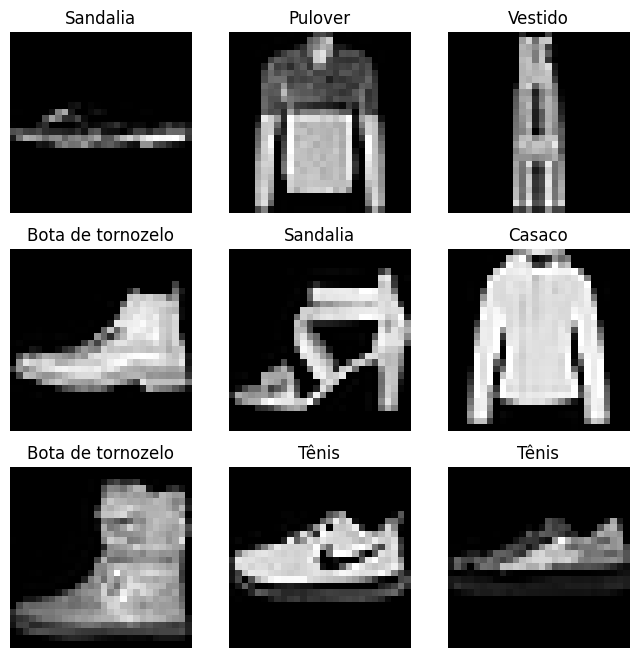

In [ ]:
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols*rows + 1):
  sample_idx = torch.randint(len(training_data),size = [1, ]).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(),cmap="gray")

## Definindo uma rede neural

### Criando classe Neural

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()

    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(TAMANHO_DA_IMAGEM * TAMANHO_DA_IMAGEM, 512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )
  def forward(self, X):
    flattened = self.flatten(X)
    output_values = self.linear_relu_stack(flattened)
    return output_values


### Modelo Neural

In [ ]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
torchinfo.summary(model, input_size=(64,1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [64, 10]                  --
├─Flatten: 1-1                           [64, 784]                 --
├─Sequential: 1-2                        [64, 10]                  --
│    └─Linear: 2-1                       [64, 512]                 401,920
│    └─ReLU: 2-2                         [64, 512]                 --
│    └─Linear: 2-3                       [64, 512]                 262,656
│    └─ReLU: 2-4                         [64, 512]                 --
│    └─Linear: 2-5                       [64, 10]                  5,130
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
Total mult-adds (M): 42.86
Input size (MB): 0.20
Forward/backward pass size (MB): 0.53
Params size (MB): 2.68
Estimated Total Size (MB): 3.41

### Funcionando CPU  

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Usando",device)

Usando cuda


## Treinando e Validando a Rede neural

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
  size= len(dataloader.dataset)
  model.train()

  for batch, (X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    pred = model(X)
    loss = loss_fn(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"Perda: {loss:>7f} [{current:>5d}/{size:>5d}]")


In [ ]:
def validacion(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)

  model.eval()

  val_loss = 0
  correct = 0

  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)

      pred = model(X)
      val_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  val_loss /= num_batches
  acuracia = correct / size

  print("Informações na validação:")
  print(f"Total de acertos: {int(correct)}")
  print(f"Total de imagens: {size}")
  print(f"Perda média: {val_loss:>8f}")
  print(f"Acurácia: {(100 * acuracia):>0.1f}%")

In [ ]:
model.to(device)
funcao_perda = nn.CrossEntropyLoss()
otimizador = torch.optim.SGD(model.parameters(),lr=TAXA_DE_APRENDIZAGEM)

### Treinando a rede

In [ ]:
for t in range(EPOCAS):
  print(f"----------------------")
  print(f"Épocas {t+1} -------------------")
  train(train_dataloader,model,funcao_perda,otimizador)
  validacion(validar_dataloader,model,funcao_perda)

print("Treino finalizado.")

----------------------
Épocas 1 -------------------
Perda: 2.307628 [    0/60000]
Perda: 2.292539 [ 6400/60000]
Perda: 2.281528 [12800/60000]
Perda: 2.279777 [19200/60000]
Perda: 2.254518 [25600/60000]
Perda: 2.238886 [32000/60000]
Perda: 2.242441 [38400/60000]
Perda: 2.215949 [44800/60000]
Perda: 2.214968 [51200/60000]
Perda: 2.194673 [57600/60000]
Informações na validação:
Total de acertos: 4609
Total de imagens: 10000
Perda média: 2.181333
Acurácia: 46.1%
----------------------
Épocas 2 -------------------
Perda: 2.191429 [    0/60000]
Perda: 2.178790 [ 6400/60000]
Perda: 2.134908 [12800/60000]
Perda: 2.146712 [19200/60000]
Perda: 2.101393 [25600/60000]
Perda: 2.057437 [32000/60000]
Perda: 2.074632 [38400/60000]
Perda: 2.013449 [44800/60000]
Perda: 2.014309 [51200/60000]
Perda: 1.955706 [57600/60000]
Informações na validação:
Total de acertos: 5714
Total de imagens: 10000
Perda média: 1.944964
Acurácia: 57.1%
----------------------
Épocas 3 -------------------
Perda: 1.978135 [    0